
**Max, Min, Midpoint and Alpha-Trimmed Mean Filters**



In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Image with noise


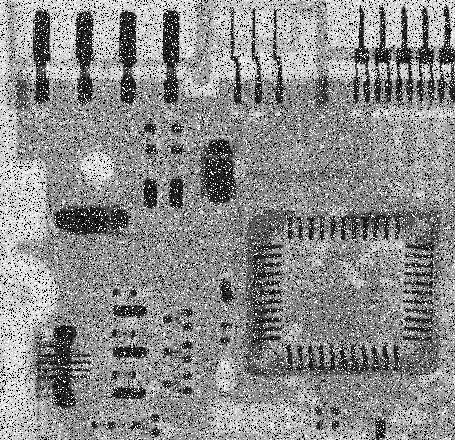

In [ ]:
image = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Computer Vision Lab/Sample Images/saltpepr-prob.tif',0);
print("Image with noise")
cv2_imshow(image)

Image filtered with median


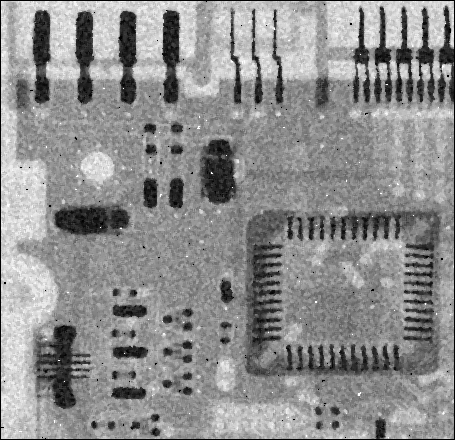

In [ ]:
median=image
medianfilter1=np.zeros((median.shape[0],median.shape[1]))
for m in range(1,median.shape[0]-1):
  for n in range(1,median.shape[1]-1):
    slice=median[m-1:m+2,n-1:n+2]
    medianfilter1[m,n]=np.median(slice)

print("Image filtered with median")
cv2_imshow(medianfilter1)

Image filtered with median a second time


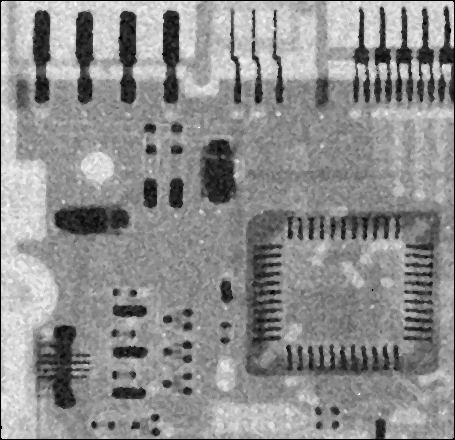

In [ ]:
median=medianfilter1
medianfilter2=np.zeros((median.shape[0],median.shape[1]))
for m in range(1,median.shape[0]-1):
  for n in range(1,median.shape[1]-1):
    slice=median[m-1:m+2,n-1:n+2]
    medianfilter2[m,n]=np.median(slice)
    
print("Image filtered with median a second time")
cv2_imshow(medianfilter2)

**Max and Min Filters**

Although the median filter is by far the order-statistic filter most used in image processing, it is by no means the only one. The median
represents the 50th percentile of a ranked set of numbers, but you will recall from basic statistics that ranking lends itself to many other
possibilities. For example, using the 100th percentile results in the so-called max filter.

**MAX FILTER**

This filter is useful for finding the brightest points in an image or for eroding dark regions adjacent to bright areas. Also, because pepper
noise has very low values, it is reduced by this filter as a result of the max selection process in the subimage area Sxy

Image passed through max filter


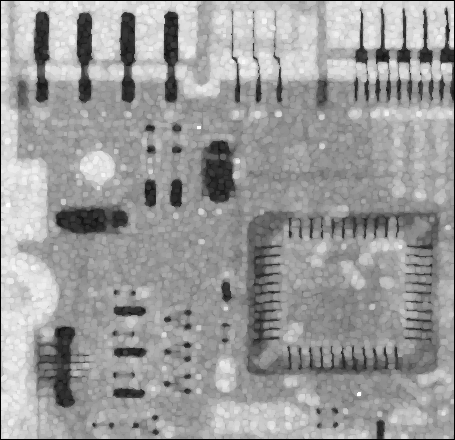

In [ ]:
median=medianfilter2
Imax=np.zeros((median.shape[0],median.shape[1]))
for m in range(1,median.shape[0]-1):
  for n in range(1,median.shape[1]-1):
    slice=median[m-1:m+2,n-1:n+2]
    Imax[m,n]=np.max(slice)
    
print("Image passed through max filter")
cv2_imshow(Imax)

The 0th percentile filter is the **Min filter** which is useful for finding the darkest points in an image or for eroding light regions adjacent to dark areas. Also, it reduces salt
noise as a result of the min operation.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


image passed through min filter


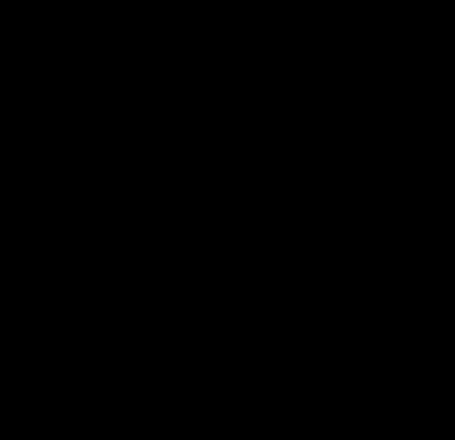

In [ ]:
I4=np.zeros((median.shape[0],median.shape[1]))
for m in range(2,median.shape[0]-2):
  for n in range(2,median.shape[1]-2):
    slice=median[m-2:m+3,n-2:n+3]
    I4[m,n]=np.min(slice)
    I4=(I4*255)/np.max(I4)

print("image passed through min filter")
cv2_imshow(I4)

Midpoint Filter
The midpoint 

image passed through midpoint filter


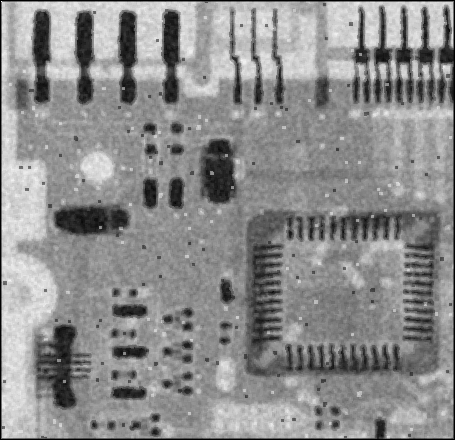

In [ ]:
midpoint=np.zeros((medianfilter1.shape[0],medianfilter1.shape[1]))
midpoint=midpoint.astype(np.float64)
for m in range(1,medianfilter1.shape[0]-1):
  for n in range(1,medianfilter1.shape[1]-1):
    slice=medianfilter1[m-1:m+2,n-1:n+2]
    midpoint[m,n]=0.5*(np.max(slice)+np.min(slice))
    midpoint=midpoint*255/np.max(midpoint)

print("image passed through midpoint filter")
cv2_imshow(midpoint)

**Alpha-Trimmed Mean Filter**

Suppose that we delete the d/2 lowest and the d/2 highest intensity values of g(r, c) in theneighborhood
the value of d can range from 0 to mn-1
When d=0 the alpha-trimmed 

image passed through alpha trimmed filter


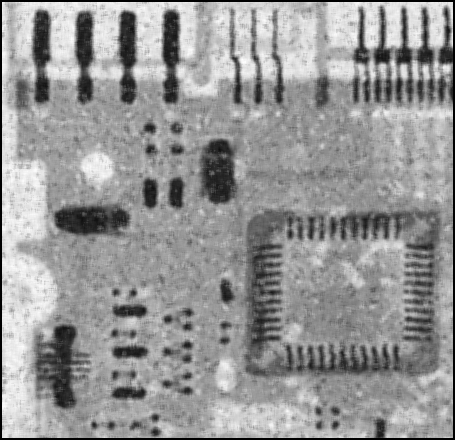

In [ ]:
  alphatrimmed=np.zeros((image.shape[0],image.shape[1]))
t=3
slice=np.zeros(25)
for m in range(2,image.shape[0]-2):
   for n in range(2,image.shape[1]-2):
    x=0
    for i in range(-2,3):
        for j in range(-2,3):
          slice[x]=image[m-i,n-j]
          x=x+1
          s=np.sort(slice)
    alphatrimmed[m,n]=np.sum(s[0+t:25-t])/(25-(2*t))
alphatrimmed=alphatrimmed*255/np.max(alphatrimmed)

print("image passed through alpha trimmed filter")
cv2_imshow(alphatrimmed)